## Requirements Check

In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 0.19.1
numpy: 1.13.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn: 0.19.0
statsmodels: 0.8.0


# Problem Description

The problem is to predict the number of monthly sales of champagne for the Perrin Freres label (named for a region in France).

The dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data.

The values are a count of millions of sales and there are 105 observations.

The dataset is credited to Makridakis and Wheelwright, 1989.   

In [2]:
from pandas import Series
series = Series.from_csv('champagne.csv', header=0)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 93, Validation 12


In [3]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

print("Train Data")
print(train)
print("Test Data")
print(test)

Train Data
[  2815.   2672.   2755.   2721.   2946.   3036.   2282.   2212.   2922.
   4301.   5764.   7312.   2541.   2475.   3031.   3266.   3776.   3230.
   3028.   1759.   3595.   4474.   6838.   8357.   3113.   3006.   4047.
   3523.   3937.   3986.   3260.   1573.   3528.   5211.   7614.   9254.
   5375.   3088.   3718.   4514.   4520.   4539.   3663.   1643.   4739.
   5428.   8314.  10651.   3633.   4292.   4154.   4121.]
Test Data
[  4647.   4753.   3965.   1723.   5048.   6922.   9858.  11331.   4016.
   3957.   4510.   4276.   4968.   4677.   3523.   1821.   5222.   6872.
  10803.  13916.   2639.   2899.   3370.   3740.   2927.   3986.   4217.
   1738.   5221.   6424.   9842.  13076.   3934.   3162.   4286.   4676.
   5010.   4874.   4633.   1659.   5951.   6981.   9851.  12670.   4348.
   3564.   4577.   4788.   4618.   5312.   4298.   1413.   5877.]


In [4]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# predict
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2899.000, Expected=3370
>Predicted=3370.000, Expected=3740
>Predicted=3740.000, Expected=2927
>Predicted=2927.000, Expected=3986
>Predicted=3986.000, Expected=4217
>Predicted=4217.000, Expected=1738
>Predicted=173

In [5]:
print(series.describe())

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Perrin Freres monthly champagne sales millions ?64-?72, dtype: float64


In [ ]:
from matplotlib import pyplot

series_train = Series.from_csv('dataset.csv')
series_train.plot()
pyplot.show()

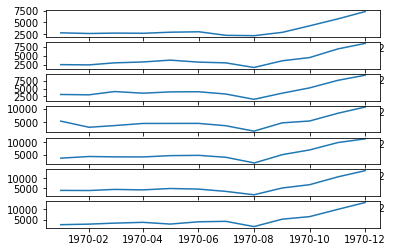

In [40]:
from pandas import DataFrame
from pandas import TimeGrouper

groups = series_train['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()


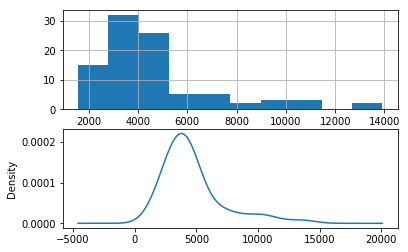

In [41]:
pyplot.figure(1)
pyplot.subplot(211)
series_train.hist()
pyplot.subplot(212)
series_train.plot(kind='kde')
pyplot.show()

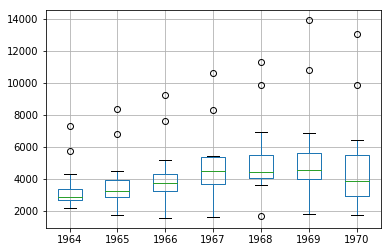

In [42]:
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()

ADF Statistic: -7.134898
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


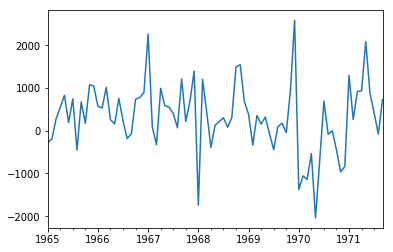

>Predicted=8089.864, Expected=8314
>Predicted=9742.815, Expected=10651
>Predicted=5986.917, Expected=3633
>Predicted=3886.768, Expected=4292
>Predicted=4038.136, Expected=4154
>Predicted=4992.339, Expected=4121
>Predicted=5156.491, Expected=4647
>Predicted=5046.601, Expected=4753
>Predicted=4143.802, Expected=3965
>Predicted=2102.971, Expected=1723
>Predicted=5228.321, Expected=5048
>Predicted=5873.372, Expected=6922
>Predicted=8571.289, Expected=9858
>Predicted=11005.988, Expected=11331
>Predicted=4087.489, Expected=4016
>Predicted=4771.840, Expected=3957
>Predicted=4676.087, Expected=4510
>Predicted=4583.386, Expected=4276
>Predicted=5117.354, Expected=4968
>Predicted=5208.158, Expected=4677
>Predicted=4436.430, Expected=3523
>Predicted=2180.851, Expected=1821
>Predicted=5471.207, Expected=5222
>Predicted=7337.589, Expected=6872
>Predicted=10268.440, Expected=10803
>Predicted=11725.325, Expected=13916
>Predicted=4519.433, Expected=2639
>Predicted=4606.061, Expected=2899
>Predicted=49

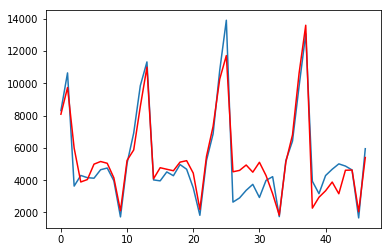

In [54]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller


# create a differenced series
def difference(dataset, flag, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    
    if(flag==0):
        return diff
    else:
        return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

months_in_year = 12

X = series_train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

stationary = difference(X, 1,months_in_year)
stationary.index = series_train.index[months_in_year:]

result = adfuller(stationary)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

stationary.to_csv('stationary.csv')

stationary.plot()
pyplot.show()

# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    diff = difference(history,0,months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()